# Part I - (Dataset Exploration Title)
## by Vu Minh Quan

## Introduction

>The dataset is a statistics about health insurance price with 1338 observations and 7 variables including age of responsers, sex, bmi (body mass index), children, smoker, region and charges.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log
import warnings
%matplotlib inline
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# read csv dataset by pandas
df = pd.read_csv('Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
# Check number of rows and columns in dataset
print("row :",df.shape[0]," ","column :",df.shape[1])

row : 1338   column : 7


In [5]:
# describe dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Check null in dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### What is the structure of your dataset?

> This is Health insurance dataset containing 1338 rows and 7 variables including age of responsers, sex, bmi (body mass index), children, smoker, region and charges. After checking step, the dataset has no null values and outliers. To deep dive each variables, please follow the explaination below:

> * age: age of primary beneficiary
> * sex: insurance contractor gender, female, male
> * bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
> * children: Number of children covered by health insurance / Number of dependents
> * smoker: Smoking
> * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
> * charges: Individual medical costs billed by health insurance

### What is/are the main feature(s) of interest in your dataset?

> The my favorite feature is health insurance charges. Which elements can affect on health insurance charges that they are willing to pay such as smokers, sex, a number of children. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Smoking, sex, a number of children of responsers certainly help support my investigation. For example, smokers who might have lung cancer, other diseases are willing to invest the health inssurance. Female responsers usually intend to worry about their health-related risks so they can become potential customers for health issurance companies. Finally, parents might be prefer investing health insurance soon for their children. 

## Univariate Exploration



## How is density of charges variable?

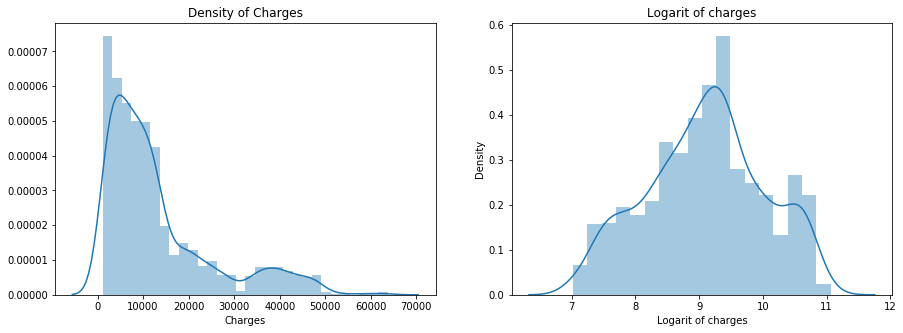

In [14]:
# visualize density of charges variable
fig =plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax=sns.distplot(df.charges);

ax1 = fig.add_subplot(122)
ax1=sns.distplot(log(df.charges));

# Set common labels
ax1.set_xlabel('Logarit of charges')
ax1.set_ylabel('Density')
ax1.set_title('Logarit of charges')

ax.set_title('Density of Charges')
ax.set_xlabel('Charges');


The left graph show that the distribution of charges is skewed so we use logarit to re-scale this variable (the right chart)

## What percentage is sex of responsers ?

In [10]:
def pie_plot(column_name, y_col, title, colors, explode):
    # visualize sex of responsers 
    df.groupby([f'{column_name}']).count().plot(kind='pie',
                                    y=f'{y_col}', 
                                    autopct='%.0f%%', 
                                    explode=explode, 
                                    figsize=(8,8),
                                    colors=colors,
                                    legend=True, title=f'{title}',
                                    fontsize=14)
    plt.axis('off')
    plt.show()

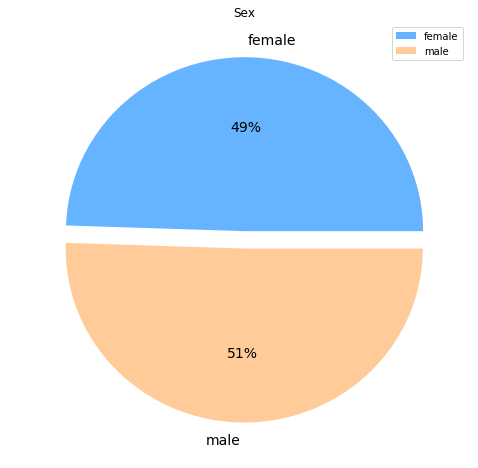

In [11]:
# visualize sex of responsers 
colors = ['#66b3ff', '#ffcc99']
explode = (0.05, 0.05)
pie_plot('sex', 'age', 'Sex', colors, explode)

The chart shows the percentage of male and female in dataset. It is clear that ratio of female responsers (49%) nearly equal to male ones (50%)

## How is age distribution?

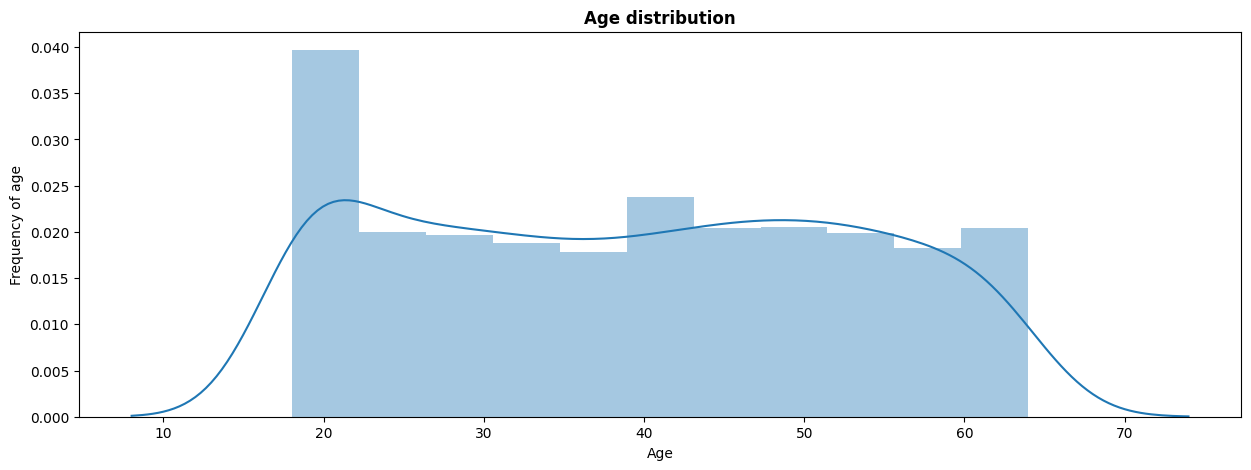

In [51]:
# visualize age distibution
fig =plt.figure(figsize=(15,5))
sns.distplot(df.age);
plt.title("Age distribution", fontweight='bold');
plt.xlabel("Age");
plt.ylabel("Frequency of age");

The chart reprents the age of responsers are highly 20 years old and the range of age of responsers is 20-65

## How is bmi distribution?

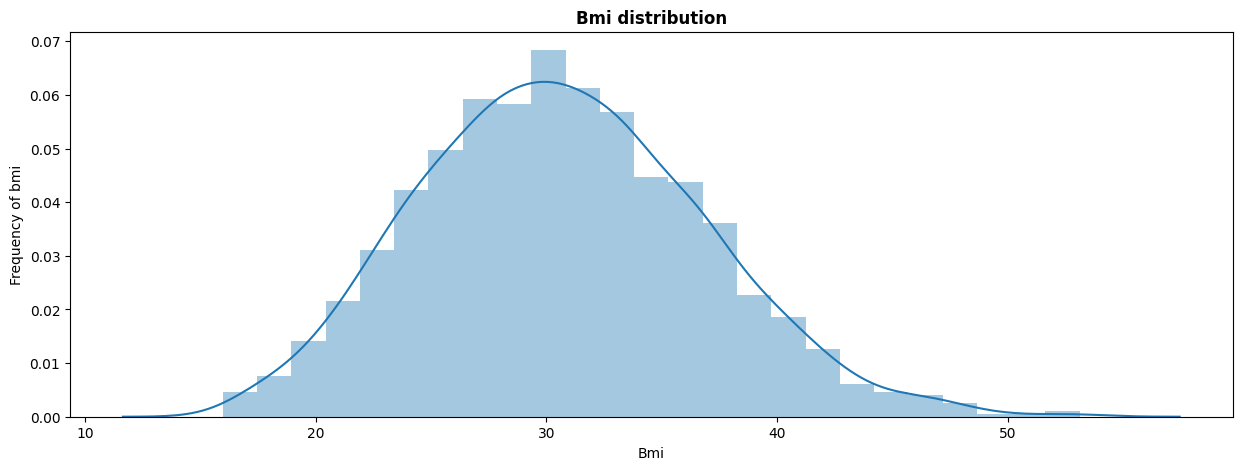

In [52]:
# visualize bmi distribition
fig =plt.figure(figsize=(15,5))
sns.distplot(df.bmi);
plt.title("Bmi distribution", fontweight='bold');
plt.xlabel("Bmi");
plt.ylabel("Frequency of bmi");

The chart illustates the normal distribution of this variable. The range of this is from nearly 17 to over 50 point.

## How is children distribution?

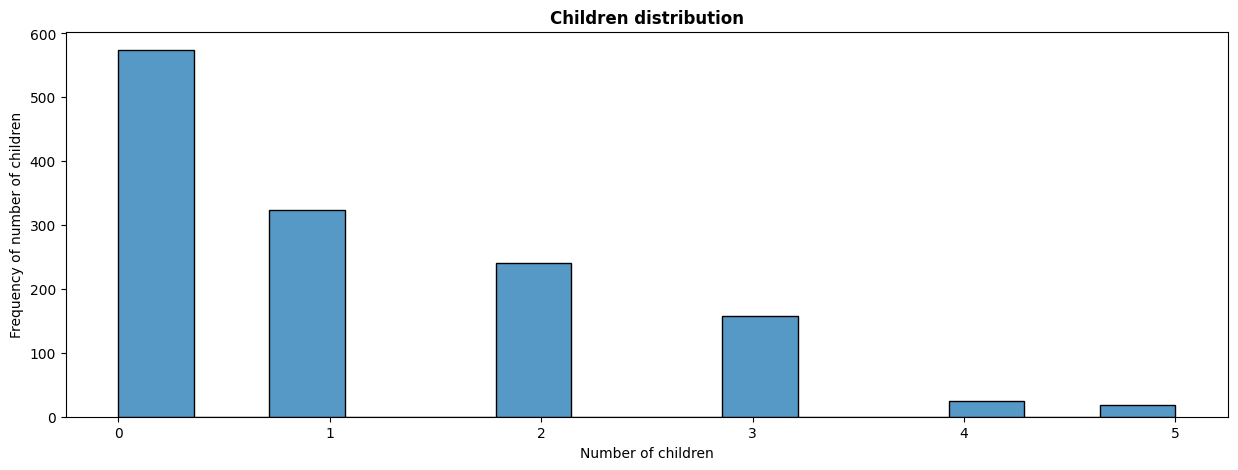

In [53]:
# visualize chidren distribution
fig =plt.figure(figsize=(15,5))
sns.histplot(df.children);
plt.title("Children distribution", fontweight='bold');
plt.xlabel("Number of children");
plt.ylabel("Frequency of number of children");

Responsers with no children are the highest bar. That can be caused by the large 20 year-old responsers. The families with 4 or 5 children are the lowest bar. We can take deep dive in to this question in Bivariate Exploration part.

## What percentage is smokers in dataset?

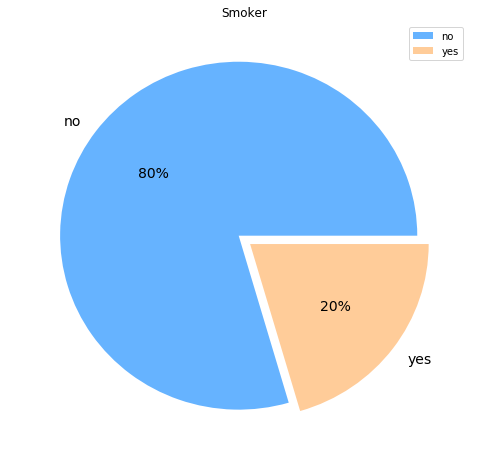

In [13]:
# visualize the percentage of smokers in dataset
explode = (0.04, 0.04)
colors = ['#66b3ff', '#ffcc99']
pie_plot('smoker', 'age', 'Smoker', colors, explode)

The pie chart shows the percentage of smokers is fourtimes larger than ones who do not smoke. 

## What percentage are regions that responsers are living?

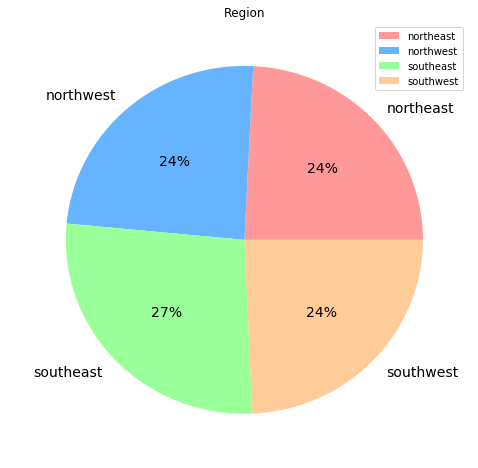

In [12]:
# visualize the percentage of each region of responsers
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
pie_plot('region', 'age', 'Region', colors, None)

There are 4 regions in dataset and percentage of responsers who living in regions is nearly the same as the others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After analysis, the dataset has good percentage of sex, and regions because sex and regions have the same percentage of each element for each variable. However, charges variable has no the same scale with the orthers. For example, this variable have scale around 10000-30000, while age has range 20-50. That will affect on my regression so I need to re-scale it by logarit function. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Charges variable has no the same scale with the orthers. For example, this variable have scale around 10000-30000, while age has range 20-50. That will affect on my analysis so I need to re-scale it to range 0-1 by logarit function. Simultaneously, the distribution of this variable change from skewed distribution to normal distribution.

## Bivariate Exploration

## How is density of charges by sex?

Text(23.999999999999993, 0.5, 'Sex')

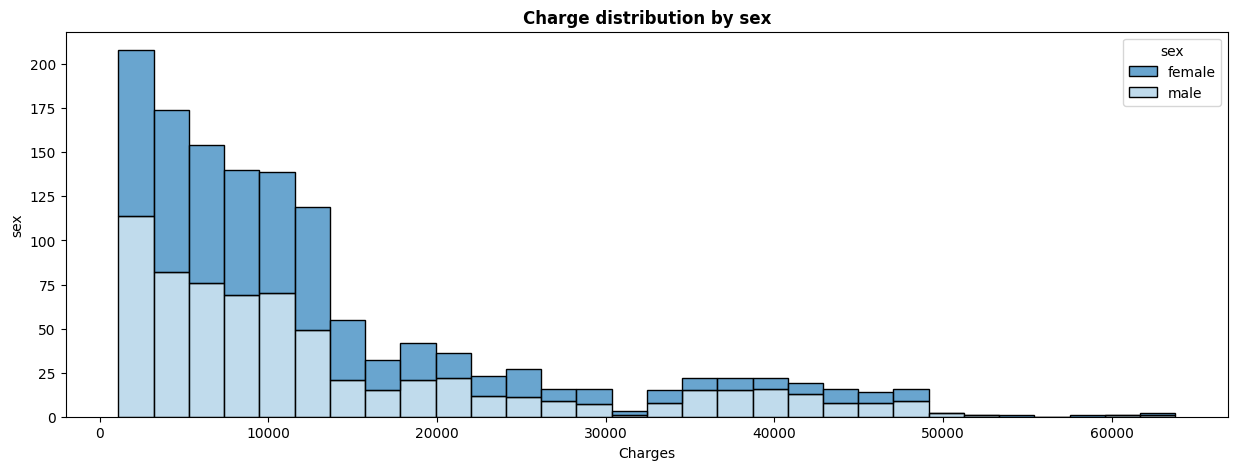

In [56]:
# visualize density of charges by sex
fig =plt.figure(figsize=(15,5))
sns.histplot(data=df, x=df['charges'],  hue='sex',  multiple="stack", palette="Blues_r")
plt.title("Charge distribution by sex", fontweight='bold');
plt.xlabel("Charges");
plt.ylabel("sex");

ax.set_title('Density of Charges by sex')
ax.set_xlabel('Charges')
ax.set_ylabel('Sex')


## How is Charge distribution by smokers?

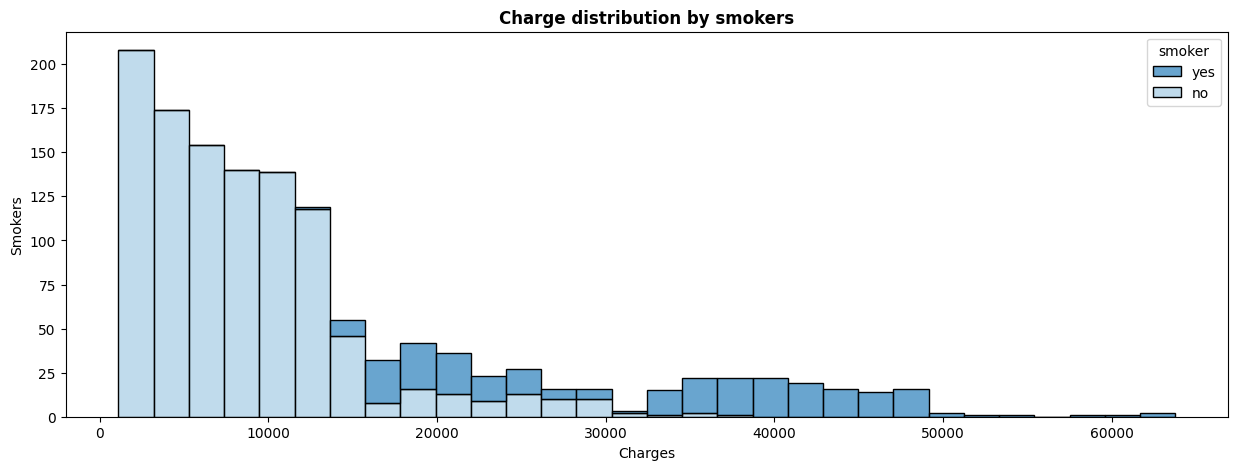

In [57]:
# visualize charge distribution by smokers
fig =plt.figure(figsize=(15,5))
sns.histplot(data=df, x=df['charges'],  hue='smoker',  multiple="stack", palette="Blues_r")
plt.title("Charge distribution by smokers", fontweight='bold');
plt.xlabel("Charges");
plt.ylabel("Smokers");

## How is Age distribution by smokers?

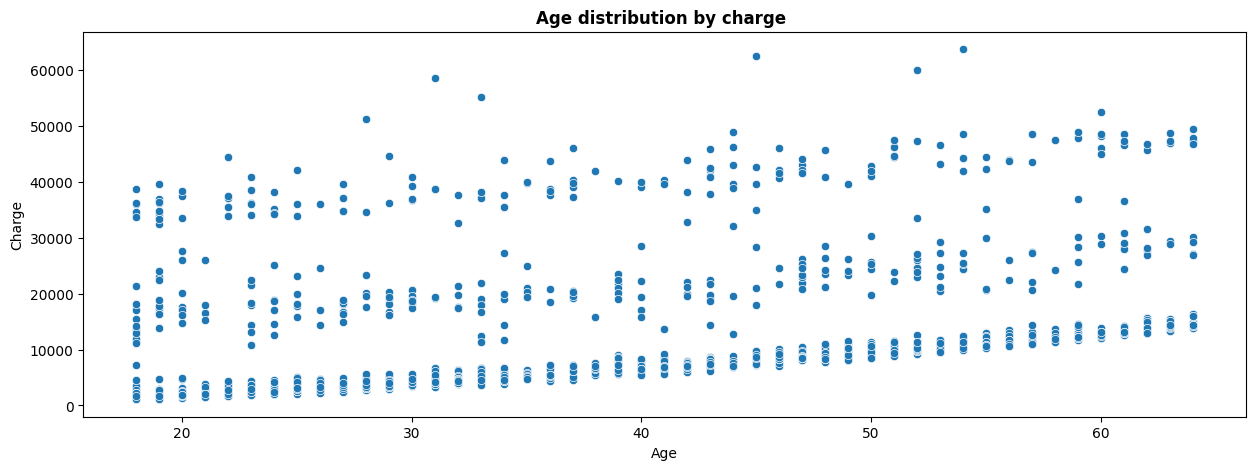

In [58]:
fig =plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x=df['age'], y =df['charges']);
plt.title("Age distribution by charge ", fontweight='bold');
plt.xlabel("Age");
plt.ylabel("Charge");

## How is Age distribution by children?

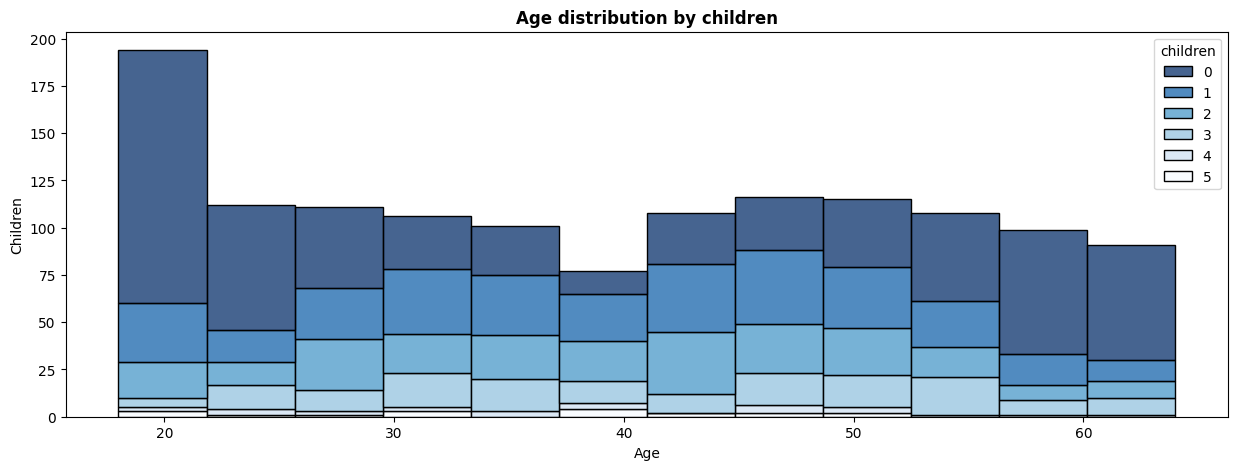

In [59]:
# visualize age distribution by children
fig =plt.figure(figsize=(15,5))
sns.histplot(data=df, x=df['age'],  hue='children',  multiple="stack", palette="Blues_r");
plt.title("Age distribution by children", fontweight='bold');
plt.xlabel("Age");
plt.ylabel("Children");

## How is Bmi distribution by smokers?

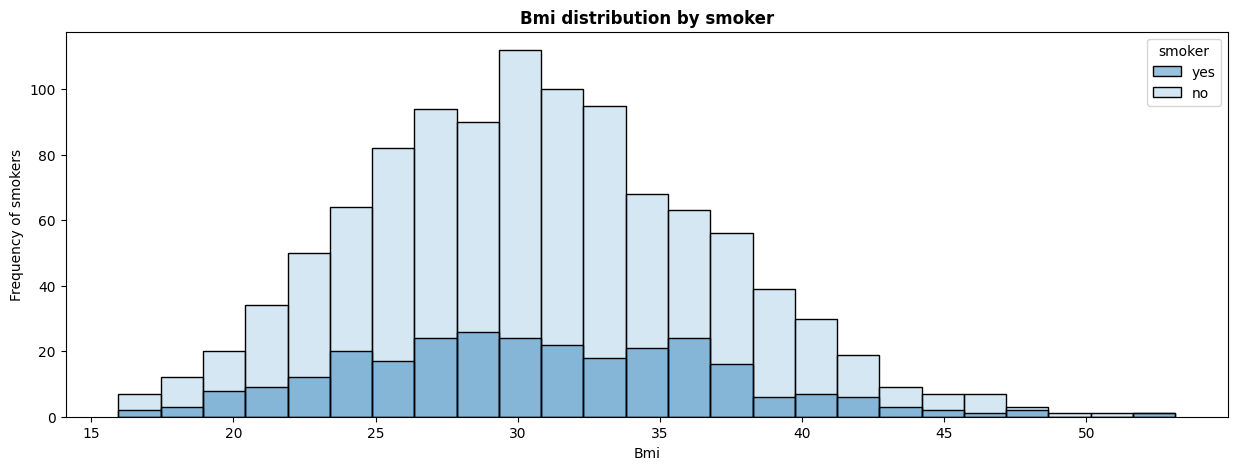

In [60]:
fig =plt.figure(figsize=(15,5))
sns.histplot(data=df, x=df['bmi'],  hue='smoker', palette="Blues_r");
plt.title("Bmi distribution by smoker", fontweight='bold');
plt.xlabel("Bmi");
plt.ylabel("Frequency of smokers");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After investigation, smokers, sex are variables that impact on charges variable. To be specifc, the responsers who do not smoke intend to invest more money on health insurance than smokers. Besides, the number of male who pay insurance fee more than male. Age, children, bmi variables do not affect on health insurance much.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Due to above investigation, I found that age element does not impact on number of children. For example, 20 year-old responsers with 5 children occur highest part and over 50 responsers with no children have the large part, also. 

## Multivariate Exploration


## How are Bmi and charges by smoker?

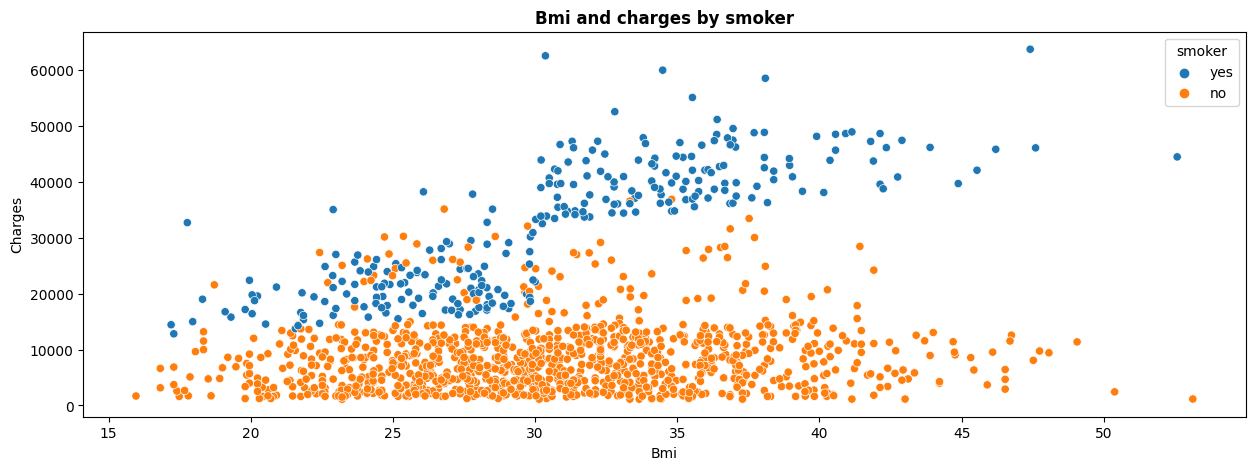

In [61]:
# visualize Bmi and charges by smoker
fig =plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")
plt.title("Bmi and charges by smoker", fontweight='bold');
plt.xlabel("Bmi");
plt.ylabel("Charges");

## How are Children and charges by smoker?

In [62]:
def strip_plot(data, x_col, y_col, hue_col, title, xlabel, ylabel):
    fig =plt.figure(figsize=(15,5))
    sns.stripplot(data=data, x=f"{x_col}", y=f"{y_col}", hue=f"{hue_col}")
    plt.title(f"{title}", fontweight='bold');
    plt.xlabel(f"{xlabel}");
    plt.ylabel(f"{ylabel}");
    plt.show()

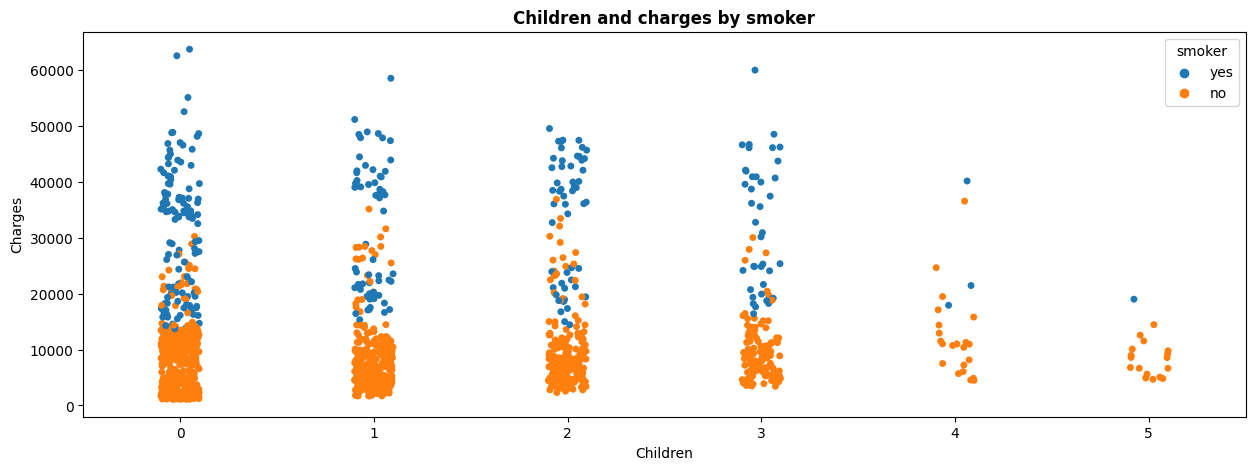

In [63]:
# visualize Children and charges by smoker
strip_plot(df, "children", "charges", "smoker", "Children and charges by smoker", "Children", "Charges")

## How are age and charges by smoker ?

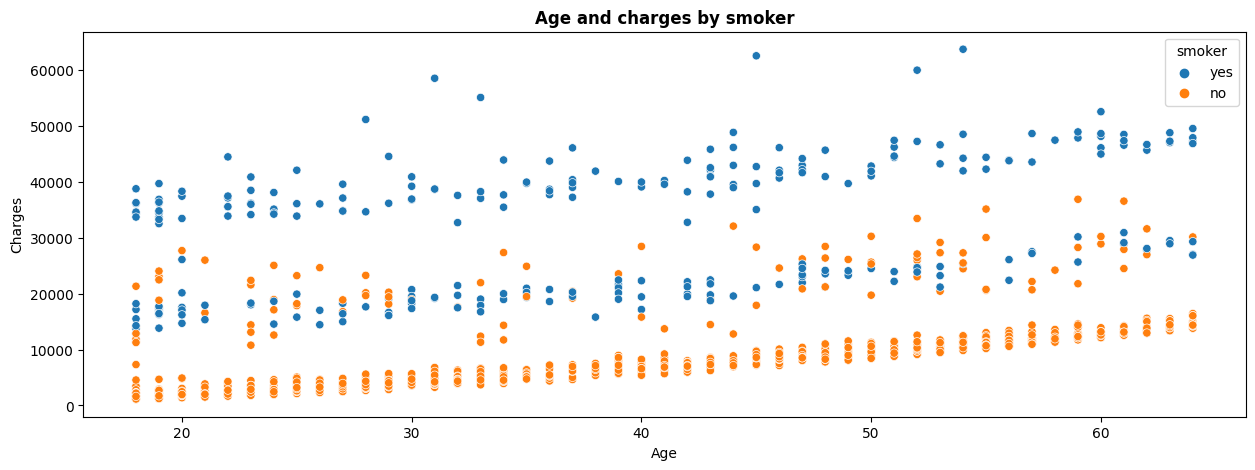

In [64]:
# visualize age and charges by smoker
fig =plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
plt.title("Age and charges by smoker", fontweight='bold');
plt.xlabel("Age");
plt.ylabel("Charges");

## How are sex and charges by smoker ?

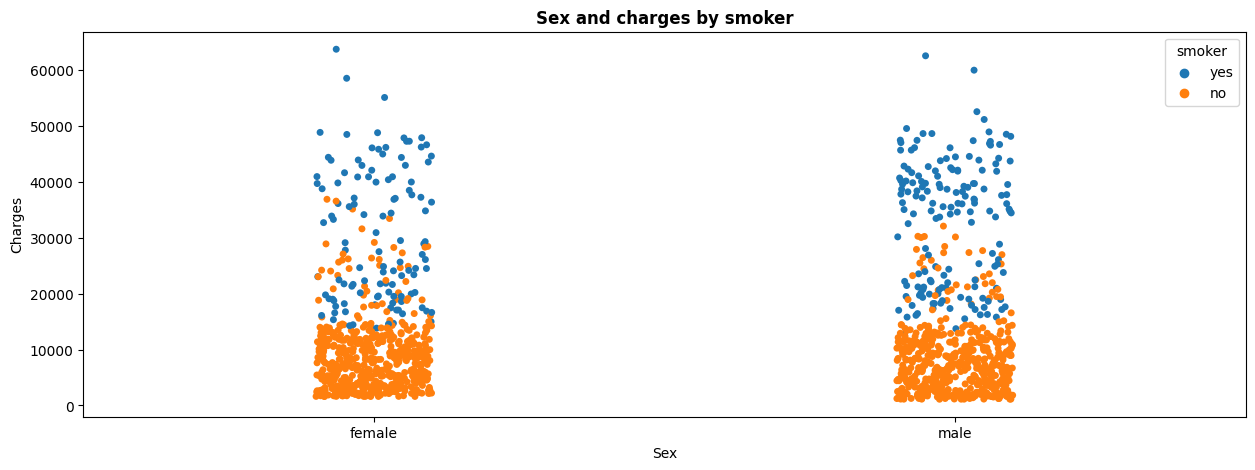

In [65]:
# visualize sex and charges by smoker
strip_plot(df, "sex", "charges", "smoker", "Sex and charges by smoker", "Sex", "Charges")

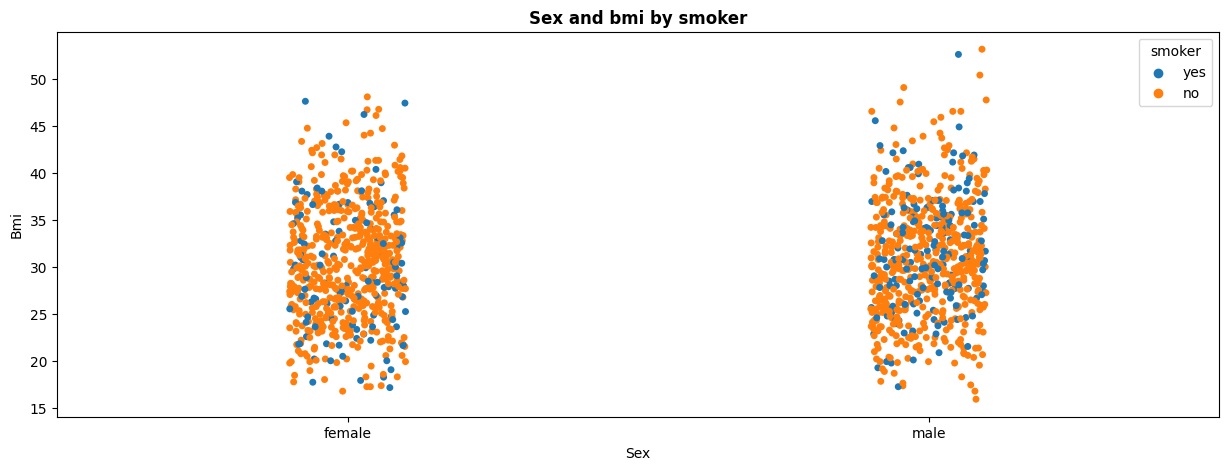

In [66]:
# visualize sex and bmi by smoker
strip_plot(df, "sex", "bmi", "smoker", "Sex and bmi by smoker", "Sex", "Bmi")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The more bmi point the smokers have, the higher charges they get. Besides, responsers who have less children in insurance health program will have more medical fee paid by insurance health, especially smokers. Moreover, sex of smokers and non-smokers does not impact much on medical fee paid by insurance health. Finally, sex and smoking behavior do not affect on bmi, which is Body mass index, providing an understanding of body, weights.

### Were there any interesting or surprising interactions between features?

> The more bmi point the smokers have, the higher charges they get. Besides, responsers who have less children in insurance health program will have more medical fee paid by insurance health, especially smokers. That can prove smokers with no children can have high medical fee paid by insurance health. Moreover, responsers have more children, the less smokers we have.

## Conclusions
> In conclusion, the more bmi point the smokers have, the higher charges they get. Besides, responsers who have less children in insurance health program will have more medical fee paid by insurance health, especially smokers. Moreover, sex of smokers and non-smokers does not impact much on medical fee paid by insurance health. Finally, sex and smoking behavior do not affect on bmi, which is Body mass index, providing an understanding of body, weights. Moreover, responsers have more children, the less smokers we have. 


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0